# PBF X CADÚnico

In [1]:
# Arquivos da pasta DATA
# 'data/municipios_codigos.json'

In [2]:
# Bibliotecas utilizadas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from geojson_rewind import rewind
import plotly.express as px
import plotly.io as pio
import json
pio.renderers.default = 'iframe'


## I. Bases de dados
As bases de dados que serão utilizadas aqui são:
- Programa Bolsa Família - setembro/2023
- Cadastro Único - agosto/2023 

### 1. PBF 2023
Dados do programa Bolsa Família do ano de 2023

In [3]:
url_pbf = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial/?fq=anomes_s:2023*&fl=codigo_ibge%2Canomes_s%2Cqtd_familias_beneficiarias_bolsa_familia_s%2Cvalor_repassado_bolsa_familia_s%2Cpbf_vlr_medio_benef_f&fq=valor_repassado_bolsa_familia_s%3A*&q=*%3A*&rows=100000&sort=anomes_s%20desc%2C%20codigo_ibge%20asc&wt=csv'
pd_pbf_2023 = pd.read_csv(url_pbf, sep = ",")
pd_pbf_2023.rename(columns={'codigo_ibge': 'ibge_6'}, inplace=True)
pd_pbf_2023.head()

,ibge_6,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f
0,110001,202310,1765,1213683.0,687.64
1,110002,202310,6573,4535509.0,690.02
2,110003,202310,319,212850.0,669.34
3,110004,202310,5968,4118652.0,690.12
4,110005,202310,1112,809881.0,728.31


#### 1a) Setembro de 2023
Recorte dos dados de Setembro de 2023

In [4]:
pd_pbf_set23 = pd_pbf_2023[pd_pbf_2023['anomes_s'] == 202309]
pd_pbf_set23.describe()

,ibge_6,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f
count,5570.000000,5570.0,5570.000000,5.570000e+03,5570.000000
mean,325358.627828,202309.0,3856.147935,2.618194e+06,686.351321
std,98491.033878,0.0,16968.597271,1.145936e+07,28.937782
min,110001.000000,202309.0,6.000000,4.125000e+03,497.730000
25%,251212.500000,202309.0,520.250000,3.533988e+05,669.430000
50%,314627.500000,202309.0,1358.500000,9.281800e+05,682.655000
75%,411918.750000,202309.0,3395.750000,2.319366e+06,698.105000
max,530010.000000,202309.0,752313.000000,5.109573e+08,970.140000


### 2. CADÚnico 2023
Dados do programa Bolsa Família do ano de 2023

In [5]:
url_cad_2023 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2023*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
pd_cadunico_2023 = pd.read_csv(url_cad_2023, sep = ",")
pd_cadunico_2023.rename(columns={'ibge': 'ibge_6'}, inplace=True)
pd_cadunico_2023.head()


,ibge_6,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,202308,4863,12536,2916,8712,753,2403,794,2176,1547,4579
1,110002,202308,18435,43034,11545,30454,2826,7904,3326,8153,6152,16057
2,110003,202308,933,2529,596,1807,159,493,112,310,271,803
3,110004,202308,18058,42056,10222,27382,2302,6428,3467,8541,5769,14969
4,110005,202308,3136,7653,1876,5311,531,1524,554,1557,1085,3081


#### 2a) Agosto de 2023
Recorte dos dados de Agosto de 2023

In [6]:
#pd_cadunico_2023['anomes'].unique()
pd_cadu_ago23 = pd_cadunico_2023[pd_cadunico_2023['anomes'] == 202308]
pd_cadu_ago23.columns

Index(['ibge_6', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [7]:
pd_cadu_ago23.describe()

,ibge_6,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
count,5570.000000,5570.0,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5570.000000,5570.000000,5570.000000,5.570000e+03,5570.000000,5.570000e+03
mean,325358.627828,202308.0,7.687290e+03,1.726919e+04,5.500938e+03,1.342370e+04,664.597127,1734.261221,3476.244704,7.934391e+03,4140.841831,9.668652e+03
std,98491.033878,0.0,3.618983e+04,7.710320e+04,2.535108e+04,5.700553e+04,3412.697478,8392.476936,16167.518908,3.318053e+04,19263.197401,4.079842e+04
min,110001.000000,202308.0,3.700000e+01,9.200000e+01,2.200000e+01,5.700000e+01,1.000000,1.000000,0.000000,0.000000e+00,3.000000,9.000000e+00
25%,251212.500000,202308.0,1.292250e+03,3.041500e+03,8.290000e+02,2.175250e+03,78.000000,226.000000,363.250000,8.682500e+02,526.000000,1.311000e+03
50%,314627.500000,202308.0,2.825000e+03,6.615500e+03,1.943500e+03,5.009000e+03,183.000000,511.000000,1091.000000,2.595000e+03,1382.500000,3.407000e+03
75%,411918.750000,202308.0,6.281750e+03,1.463475e+04,4.536750e+03,1.170575e+04,463.750000,1267.250000,2984.750000,7.241750e+03,3471.500000,8.556250e+03
max,530010.000000,202308.0,1.842573e+06,4.129005e+06,1.155211e+06,2.748069e+06,171399.000000,442307.000000,634135.000000,1.350343e+06,805534.000000,1.792650e+06


## II. Porcentagem de famílias necessitadas atendidas 
Para cada município cada município, foi calculado :
 
 Número de Famílias atendidas pelo bolsa família em setembro de 2023 pd_pbf_set23[qtd_familias_beneficiarias_bolsa_familia_s]
 
 /
 
 Número de famílias cadastradas nas faixas de pobreza e extrama pobreza no CAdÚnico de agosto de 2023 pd_cadu_ago23['cadunico_tot_fam_pob'] + pd_cadu_ago23['cadunico_tot_fam_ext_pob']
 
 X
 
 100

### 1. Criando base única
O primeiro passo para  calcular  Porcentagem de famílias necessitadas atendidas foi juntar as bases de dados do Programa Bolsa Família setembro/2023 e do Cadastro Único agosto/2023.

Também incluímos as informações municipais da base do IBGE.


In [8]:
# Chamando informações municipais
cd_municipio = pd.read_json('data/municipios_codigos.json')
cd_municipio['ibge_6'] = ((cd_municipio['id'].astype(str)).str[:6]).astype(int)
cd_municipio.rename(columns={'id': 'ibge_7'}, inplace=True)

In [9]:
# MESCLANDO as Bases e adicionando informações municipais
pd_pbf_cadUnico_total = pd.merge(pd_pbf_set23, pd_cadu_ago23, left_on = ['ibge_6'], 
         right_on=['ibge_6'], how = 'outer')
pd_pbf_cadUnico_total = pd.merge(pd_pbf_cadUnico_total, cd_municipio, left_on = ['ibge_6'], 
         right_on=['ibge_6'], how = 'outer')

In [10]:
# Limpeza da base: retirar as colunas desnecessárias e renomear conforme necessidade
pd_pbf_cadUnico = pd_pbf_cadUnico_total.drop(columns = ['anomes_s', 'pbf_vlr_medio_benef_f', 'anomes', 'cadunico_tot_pes', 'cadunico_tot_pes_rpc_ate_meio_sm',
                                                        'cadunico_tot_pes_pob', 'cadunico_tot_pes_ext_pob','cadunico_tot_pes_pob_e_ext_pob'])


pd_pbf_cadUnico = pd_pbf_cadUnico.rename(columns = {'qtd_familias_beneficiarias_bolsa_familia_s': 'qtd_fam_beneficiadas', 
                                         'valor_repassado_bolsa_familia_s': 'valor_repassado_bf', 'cadunico_tot_fam_rpc_ate_meio_sm': 'cadunico_fam_rpc_ate_meio_sm', 
                                         'cadunico_tot_fam_pob': 'cadunico_fam_pob', 'cadunico_tot_fam_ext_pob': 'cadunico_fam_ext_pob', 
                                         'cadunico_tot_fam_pob_e_ext_pob': 'cadunico_fam_pob_e_ext_pob'})

pd_pbf_cadUnico.columns


Index(['ibge_6', 'qtd_fam_beneficiadas', 'valor_repassado_bf',
       'cadunico_tot_fam', 'cadunico_fam_rpc_ate_meio_sm', 'cadunico_fam_pob',
       'cadunico_fam_ext_pob', 'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city'],
      dtype='object')

In [11]:
# Cálculo da porcentagem de famílias necessitadas atendidas
pd_pbf_cadUnico['pbf_cadUnico_pob_ep'] = pd_pbf_cadUnico['qtd_fam_beneficiadas'] / pd_pbf_cadUnico['cadunico_fam_pob_e_ext_pob'] * 100

# Complementarmente, foi realizado também o cálculo sobre todas as famílias cadunico_fam_rpc_ate_meio_sm 
#(cadunico_tot_fam_rpc_ate_meio_sm: total de famílias com renda per capita até meio salário mínimo)

pd_pbf_cadUnico['pbf_cadUnico_ate_meio_sm'] = pd_pbf_cadUnico['qtd_fam_beneficiadas'] / pd_pbf_cadUnico['cadunico_fam_rpc_ate_meio_sm'] * 100


In [12]:
pd_pbf_cadUnico.columns

Index(['ibge_6', 'qtd_fam_beneficiadas', 'valor_repassado_bf',
       'cadunico_tot_fam', 'cadunico_fam_rpc_ate_meio_sm', 'cadunico_fam_pob',
       'cadunico_fam_ext_pob', 'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city',
       'pbf_cadUnico_pob_ep', 'pbf_cadUnico_ate_meio_sm'],
      dtype='object')

### 2. Limpando e Visualizando os Dados 
- Visualizar os dados para verificar distribuição, identificar outliers

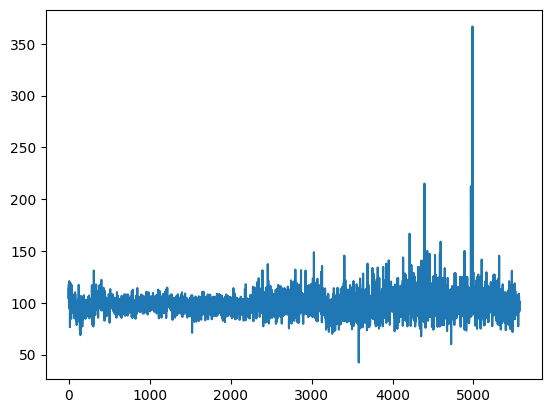

In [13]:
# Porcentagem pobreza e extrema pobreza
plt.plot(pd_pbf_cadUnico['pbf_cadUnico_pob_ep'])

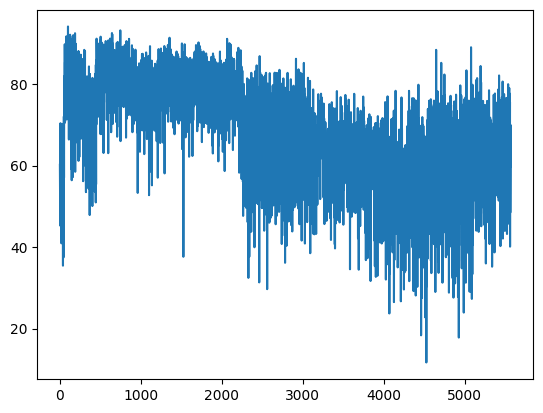

In [14]:
# Porcentagem até meio salário mínimo
plt.plot(pd_pbf_cadUnico['pbf_cadUnico_ate_meio_sm'])

<Axes: >

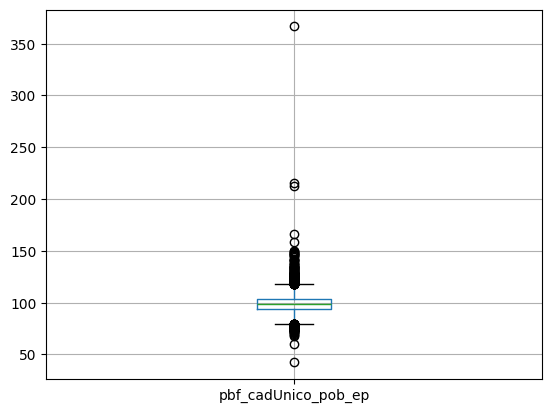

In [15]:
# Pobreza e Extrema Pobreza
pd_pbf_cadUnico[['pbf_cadUnico_pob_ep']].boxplot()

In [16]:
maiores_valores = pd_pbf_cadUnico['pbf_cadUnico_pob_ep'].nlargest(10)
menores_valores = pd_pbf_cadUnico['pbf_cadUnico_pob_ep'].nsmallest(10)

In [17]:
maiores_valores

4988    366.666667
4395    215.000000
4968    212.500000
4211    166.666667
4594    158.928571
4429    150.000000
4889    150.000000
3029    148.742138
4411    147.540984
4585    147.435897
Name: pbf_cadUnico_pob_ep, dtype: float64

In [18]:
menores_valores

3583    42.310757
4724    60.000000
4354    67.582418
146     68.718210
3255    69.927348
1525    70.967742
5482    71.731449
3214    71.845560
3272    71.980676
4026    72.463768
Name: pbf_cadUnico_pob_ep, dtype: float64

#### 2a) Teste com remoção de outliers
Ao final, decidimos manter todos os valores, sem remoção de dados.

In [19]:
retira_maiores_outliers = pd_pbf_cadUnico['pbf_cadUnico_pob_ep'] < 200
pd_pbf_cadUnico_semout_mai = pd_pbf_cadUnico[retira_maiores_outliers] 

retira_menores_outliers = pd_pbf_cadUnico_semout_mai['pbf_cadUnico_pob_ep'] >= 60
pd_pbf_cadUnico_semout = pd_pbf_cadUnico_semout_mai[retira_menores_outliers]

pd_pbf_cadUnico_semout.describe()

,ibge_6,qtd_fam_beneficiadas,valor_repassado_bf,cadunico_tot_fam,cadunico_fam_rpc_ate_meio_sm,cadunico_fam_pob,cadunico_fam_ext_pob,cadunico_fam_pob_e_ext_pob,ibge_7,pbf_cadUnico_pob_ep,pbf_cadUnico_ate_meio_sm
count,5566.000000,5566.000000,5.566000e+03,5.566000e+03,5.566000e+03,5566.000000,5566.00000,5566.000000,5.566000e+03,5566.000000,5566.000000
mean,325298.373518,3858.807941,2.619999e+06,7.692228e+03,5.504562e+03,665.042580,3478.54258,4143.585160,3.252988e+06,98.762358,68.315773
std,98496.815894,16974.403226,1.146328e+07,3.620236e+04,2.535982e+04,3413.882855,16173.09592,19269.841776,9.849682e+05,9.034104,12.525842
min,110001.000000,6.000000,4.125000e+03,3.700000e+01,2.200000e+01,1.000000,3.00000,7.000000,1.100015e+06,60.000000,11.666667
25%,251207.750000,521.000000,3.539100e+05,1.295000e+03,8.290000e+02,78.000000,364.25000,528.000000,2.512083e+06,93.724438,59.593022
50%,314615.000000,1360.500000,9.300275e+05,2.827500e+03,1.947000e+03,183.000000,1091.50000,1384.000000,3.146156e+06,98.593825,68.974458
75%,411907.500000,3398.250000,2.319625e+06,6.282750e+03,4.538500e+03,465.500000,2985.75000,3473.500000,4.119078e+06,103.293079,78.690709
max,530010.000000,752313.000000,5.109573e+08,1.842573e+06,1.155211e+06,171399.000000,634135.00000,805534.000000,5.300108e+06,166.666667,94.142094


In [20]:
pd_pbf_cadUnico_semout.shape

(5566, 12)

<Axes: >

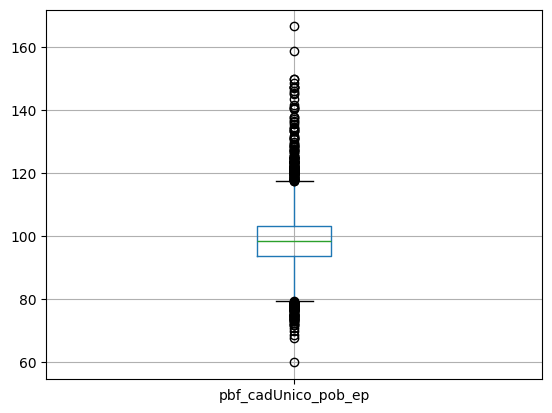

In [21]:
pd_pbf_cadUnico_semout[['pbf_cadUnico_pob_ep']].boxplot()

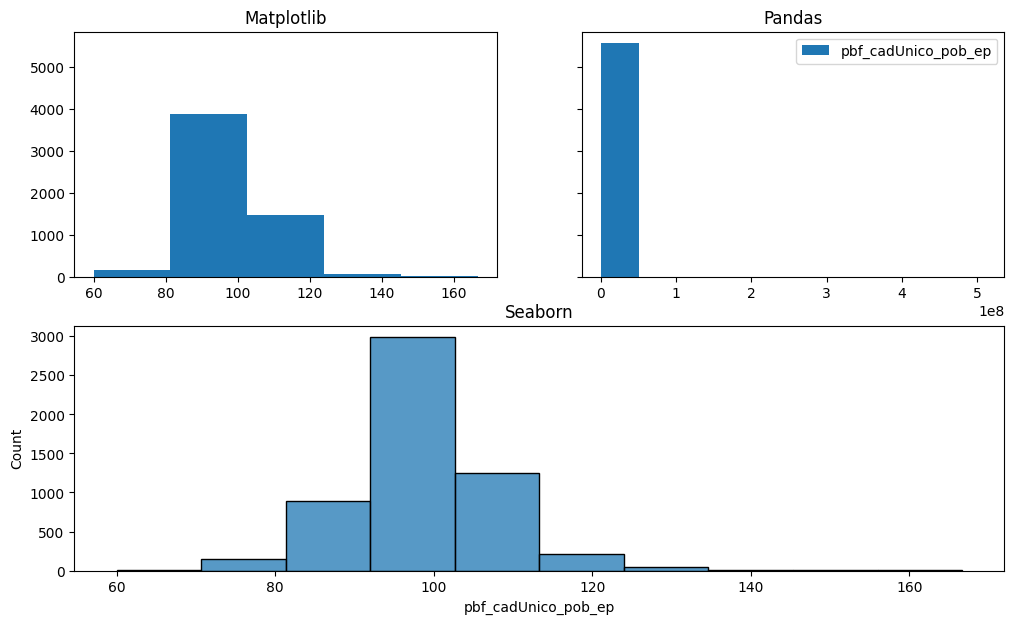

In [22]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=pd_pbf_cadUnico_semout['pbf_cadUnico_pob_ep'], bins=5);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
pd_pbf_cadUnico_semout.plot.hist(column='pbf_cadUnico_pob_ep', bins=10, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')

sns.histplot(data=pd_pbf_cadUnico_semout, x='pbf_cadUnico_pob_ep', 
             multiple='stack', bins=10, ax=ax3);
             

#### 2b) Criando classes

In [23]:
# Criando dataframe apenas com colunas que serão utilizadas
pd_indice_pbf_cadunico = pd_pbf_cadUnico[['ibge_6', 'qtd_fam_beneficiadas', 'cadunico_fam_rpc_ate_meio_sm', 'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city',
       'pbf_cadUnico_pob_ep', 'pbf_cadUnico_ate_meio_sm']]

In [24]:
pd_indice_pbf_cadunico.describe()

,ibge_6,qtd_fam_beneficiadas,cadunico_fam_rpc_ate_meio_sm,cadunico_fam_pob_e_ext_pob,ibge_7,pbf_cadUnico_pob_ep,pbf_cadUnico_ate_meio_sm
count,5570.000000,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5570.000000
mean,325358.627828,3856.147935,5.500938e+03,4140.841831,3.253591e+06,98.841609,68.288749
std,98491.033878,16968.597271,2.535108e+04,19263.197401,9.849103e+05,9.987958,12.562562
min,110001.000000,6.000000,2.200000e+01,3.000000,1.100015e+06,42.310757,11.666667
25%,251212.500000,520.250000,8.290000e+02,526.000000,2.512126e+06,93.724438,59.576283
50%,314627.500000,1358.500000,1.943500e+03,1382.500000,3.146280e+06,98.595738,68.963711
75%,411918.750000,3395.750000,4.536750e+03,3471.500000,4.119190e+06,103.299707,78.684953
max,530010.000000,752313.000000,1.155211e+06,805534.000000,5.300108e+06,366.666667,94.142094


In [25]:
# Definindo os intervalos de cada classe
pd_indice_pbf_cadunico['indice_bf'] = pd.cut(pd_indice_pbf_cadunico['pbf_cadUnico_pob_ep'], bins = [40, 80, 85, 90, 95, 100, 400]) 


C:\Users\DELL\AppData\Local\Temp\ipykernel_7644\379573606.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
pd_indice_pbf_cadunico.columns

Index(['ibge_6', 'qtd_fam_beneficiadas', 'cadunico_fam_rpc_ate_meio_sm',
       'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city', 'pbf_cadUnico_pob_ep',
       'pbf_cadUnico_ate_meio_sm', 'indice_bf'],
      dtype='object')

In [27]:
def mapear_valor(valor):
    if valor <= 80:
        return 1
    elif valor <= 85:
        return 2
    elif valor <= 90:
        return 3
    elif valor <= 95:
        return 4
    elif valor <= 100:
        return 5
    else:
        return 6

pd_indice_pbf_cadunico['cl_indice_bf'] = pd_pbf_cadUnico['pbf_cadUnico_pob_ep'].astype(float)

pd_indice_pbf_cadunico['cl_indice_bf'] = pd_indice_pbf_cadunico['cl_indice_bf'].map(mapear_valor)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7644\963506897.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_7644\963506897.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# Contando valores de cada classe do índice 
indice_pbf_cadunico = pd_indice_pbf_cadunico['indice_bf'].value_counts()
indice_pbf_cadunico = pd.DataFrame(indice_pbf_cadunico)
indice_pbf_cadunico

,count
indice_bf,
"(100, 400]",2314
"(95, 100]",1564
"(90, 95]",947
"(85, 90]",427
"(80, 85]",205
"(40, 80]",113


In [29]:
# Atribuindo valor na escala de 1 a 6 para cada classe
df_indice_pbf_cadunico = indice_pbf_cadunico.reset_index(drop=False).copy()
df_indice_pbf_cadunico['Classe'] = [6, 5, 4, 3, 2, 1]
df_indice_pbf_cadunico

,indice_bf,count,Classe
0,"(100, 400]",2314,6
1,"(95, 100]",1564,5
2,"(90, 95]",947,4
3,"(85, 90]",427,3
4,"(80, 85]",205,2
5,"(40, 80]",113,1


In [50]:
df_indice_pbf_cadunico.to_csv('data\Streamlit\indice_pbf_cadunico.csv',encoding = 'UTF-8')

#### 2c) Visualizando as classes em gráfico de barras

C:\Users\DELL\AppData\Local\Temp\ipykernel_7644\3882941735.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



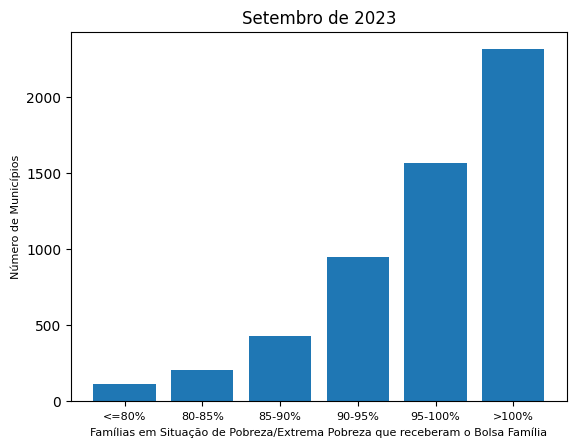

In [31]:
fig, ax = plt.subplots()

X = df_indice_pbf_cadunico['Classe']
Y = df_indice_pbf_cadunico['count']
ax.bar(X, Y)

plt.title('Setembro de 2023')

ax.set_xticklabels(['', '<=80%', '80-85%', '85-90%', '90-95%', '95-100%', '>100%'], 
                   rotation=0, fontsize=8)

ax.set_xlabel('Famílias em Situação de Pobreza/Extrema Pobreza que receberam o Bolsa Família', fontsize=8)

ax.set_ylabel('Número de Municípios', fontsize=8)

plt.show()





#### 2d) Visualizando em mapas

In [32]:
georreferenciamento_df = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

#os dados de georreferenciamento tem 7 dígitos (vamos remover o dígito verificador e atualizar o dataframe)
georreferenciamento_df['codigo_ibge'] = georreferenciamento_df['codigo_ibge'].astype('str').map(lambda x: x[:-1]).astype('int')

georreferenciamento_df.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,520005,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,310010,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,520010,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,310020,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,150010,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [33]:
pd_indice_pbf_cadunico.columns

Index(['ibge_6', 'qtd_fam_beneficiadas', 'cadunico_fam_rpc_ate_meio_sm',
       'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city', 'pbf_cadUnico_pob_ep',
       'pbf_cadUnico_ate_meio_sm', 'indice_bf', 'cl_indice_bf'],
      dtype='object')

In [34]:
#cruzamento do dataframe resultados com as informações de georreferenciamento
pd_indice_pbf_cadunico_geo = pd.merge(pd_indice_pbf_cadunico[['ibge_6', 'cl_indice_bf']],
                         georreferenciamento_df[['codigo_ibge', 'nome', 'latitude', 'longitude']],
                         left_on='ibge_6',
                         right_on='codigo_ibge',
                         how='inner')

In [52]:
pd_indice_pbf_cadunico_geo.to_csv('data\IndiceGeral\pd_indice_pbf_cadunico_geo.csv',encoding = 'UTF-8')
pd_indice_pbf_cadunico_geo.to_csv('data\Streamlit\pd_indice_pbf_cadunico_geo.csv',encoding = 'UTF-8')

In [35]:
#puxar a malha geográfica do brasil a nível de município
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio').json()


In [36]:
#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

In [51]:
with open('data\Streamlit\geojson', 'w') as arquivo:
    json.dump(geojson, arquivo)

In [37]:
fig = px.choropleth(pd_indice_pbf_cadunico_geo,
                    geojson=geojson,
                    scope='south america',
                    color='cl_indice_bf',
                    color_continuous_scale="Reds",
                    locations='ibge_6',
                    featureidkey='properties.codarea',
                    hover_name='nome').update_layout(height=800, width=1000, autosize=False)

fig.update_geos(fitbounds="locations", visible=False)

fig.update_traces(marker_line_width=0)
# Exiba o mapa
fig.show()